In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_path = "/content/drive/MyDrive/DS340 Final Project/Dataset/Audio_Speech_Actors_01-24"

In [7]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Define paths
output_path = "speech_spectrograms"

# RAVDESS emotion labels
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# Create output directories
os.makedirs(output_path, exist_ok=True)
for emotion in emotion_map.values():
    os.makedirs(os.path.join(output_path, emotion), exist_ok=True)

# Convert audio to spectrogram
for actor in tqdm(os.listdir(data_path), desc="Processing Actors"):
    actor_path = os.path.join(data_path, actor)
    if not os.path.isdir(actor_path): continue

    for filename in os.listdir(actor_path):
        if filename.endswith(".wav"):
            parts = filename.split("-")
            emotion_code = parts[2]
            emotion = emotion_map.get(emotion_code)

            if emotion is None: continue

            audio_file = os.path.join(actor_path, filename)
            y, sr = librosa.load(audio_file)
            S = librosa.feature.melspectrogram(y=y, sr=sr)
            S_dB = librosa.power_to_db(S, ref=np.max)

            # Save spectrogram image
            plt.figure(figsize=(3, 3))
            librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
            plt.axis('off')  # No axis for cleaner image
            save_path = os.path.join(output_path, emotion, filename.replace(".wav", ".png"))
            plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
            plt.close()


Processing Actors: 100%|██████████| 25/25 [09:09<00:00, 21.98s/it]


In [8]:
emotion_folders = os.listdir("speech_spectrograms")
print("Emotion folders found:", emotion_folders)

# Count how many files in each folder
for emotion in emotion_folders:
    folder_path = os.path.join("speech_spectrograms", emotion)
    num_files = len([f for f in os.listdir(folder_path) if f.endswith(".png")])
    print(f"{emotion}: {num_files} files")

Emotion folders found: ['surprised', 'neutral', 'fearful', 'angry', 'calm', 'sad', 'disgust', 'happy']
surprised: 192 files
neutral: 96 files
fearful: 192 files
angry: 192 files
calm: 192 files
sad: 192 files
disgust: 192 files
happy: 192 files


In [9]:
import os

def count_wav_files(base_path):
    total = 0
    for actor_folder in os.listdir(base_path):
        actor_path = os.path.join(base_path, actor_folder)
        if os.path.isdir(actor_path):
            total += len([f for f in os.listdir(actor_path) if f.endswith(".wav")])
    return total


speech_path = "/content/drive/MyDrive/DS340 Final Project/Dataset/Audio_Speech_Actors_01-24"

# Count

speech_count = count_wav_files(speech_path)


print(f"Total .wav files in Speech dataset: {speech_count}")



Total .wav files in Speech dataset: 1440


In [10]:
emotion_folders = os.listdir("speech_spectrograms")
print("Emotion folders:", emotion_folders)

Emotion folders: ['surprised', 'neutral', 'fearful', 'angry', 'calm', 'sad', 'disgust', 'happy']


In [11]:
print(os.listdir("speech_spectrograms/happy")[:10])

['03-01-03-01-02-02-09.png', '03-01-03-02-01-02-20.png', '03-01-03-01-01-02-02.png', '03-01-03-01-02-02-02.png', '03-01-03-02-02-01-18.png', '03-01-03-01-02-01-11.png', '03-01-03-02-01-02-18.png', '03-01-03-01-02-02-05.png', '03-01-03-02-01-01-22.png', '03-01-03-01-01-02-23.png']


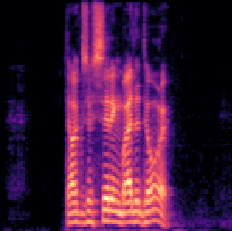

In [12]:
from IPython.display import Image, display

# Display a specific image (change path if needed)
display(Image("speech_spectrograms/happy/03-01-03-01-02-02-09.png"))

In [13]:
import shutil

# Source: Colab local folder
source_folder = "speech_spectrograms"

# Destination: Google Drive folder
destination_folder = "/content/drive/MyDrive/DS340 Final Project/speech_spectrograms"

# Copy entire folder to Drive
shutil.copytree(source_folder, destination_folder)

print(f"Saved to: {destination_folder}")

Saved to: /content/drive/MyDrive/DS340 Final Project/speech_spectrograms


In [26]:
import os

folder_path = "/content/drive/MyDrive/DS340 Final Project/speech_spectrograms/surprised"
num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in 'angry': {num_files}")

Number of files in 'angry': 192
